In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt 
from pandas import Series,DataFrame
import seaborn as sns
from pandas import ExcelFile

In [2]:
bank=pd.read_excel('Bank_Personal_Loan_Modelling-1.xlsx',sheetname='Data')

C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [3]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
bank.shape

(5000, 14)

C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduc

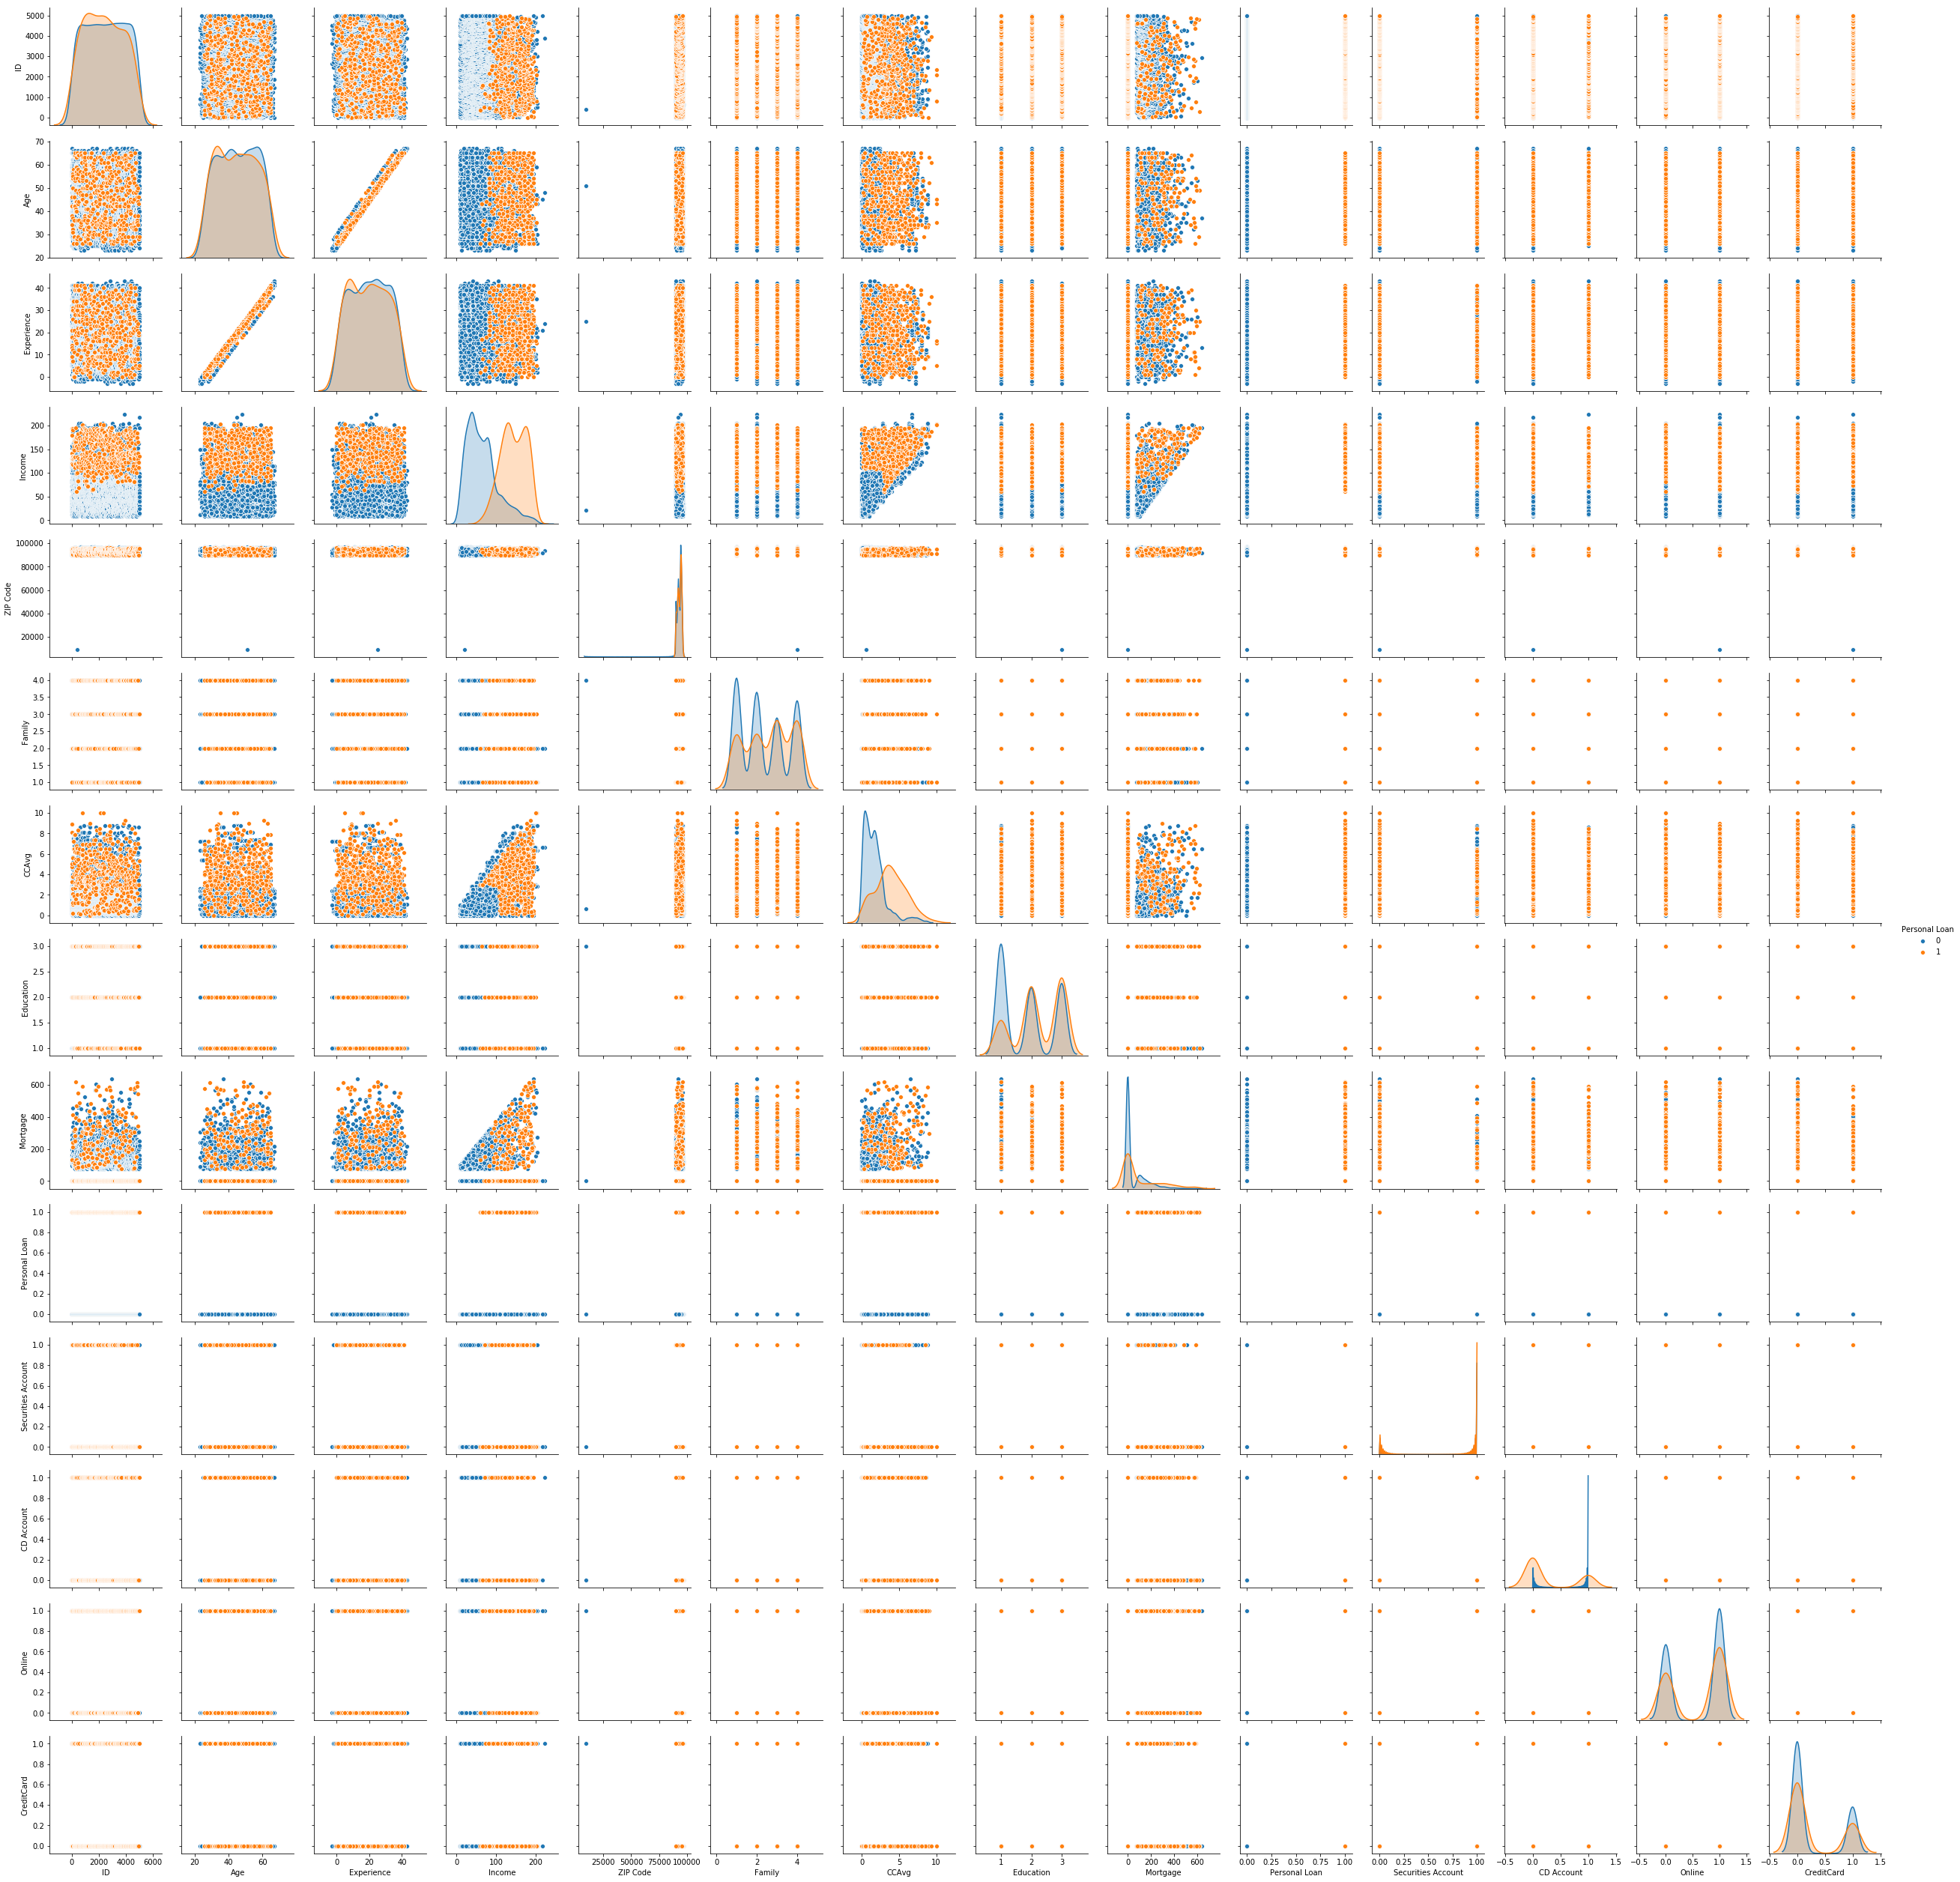

In [6]:
sns.pairplot(bank,diag_kind='kde',hue='Personal Loan')

In [7]:
bank.groupby('Personal Loan').count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


As the data is Inbalanced data and data type is float so need to change into category 

In [8]:
bank['Personal Loan']=bank['Personal Loan'].astype('category')

In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null category
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: category(1), float64(1), int64(12)
memory usage: 512.9 KB


# OUTLIERS

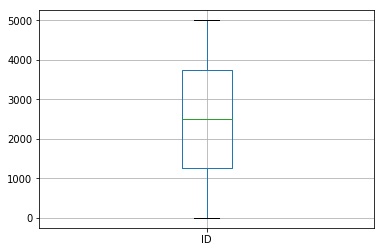

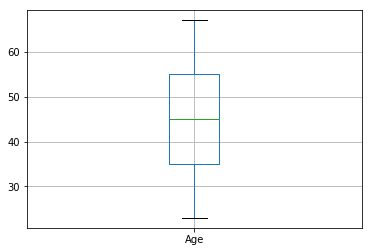

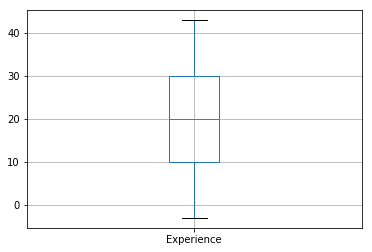

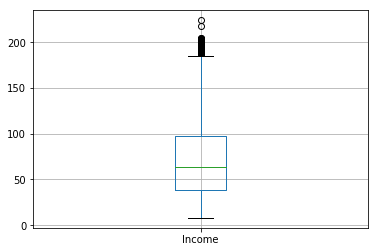

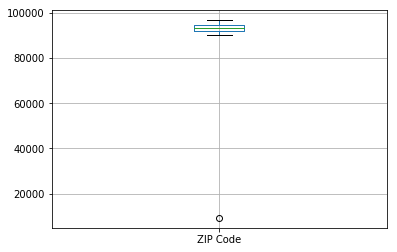

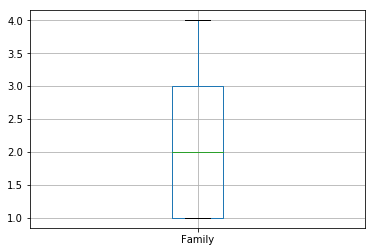

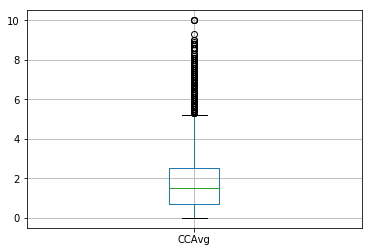

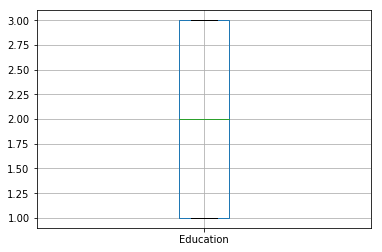

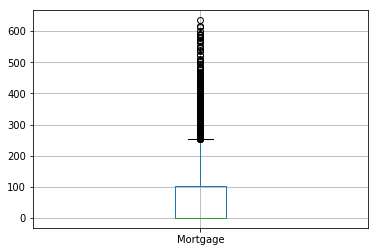

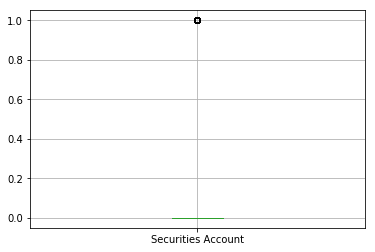

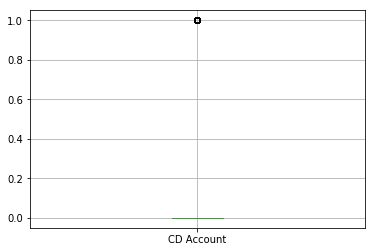

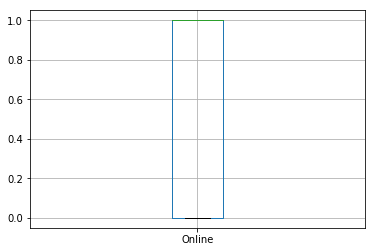

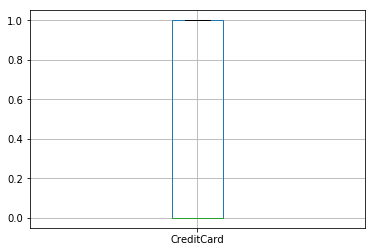

In [10]:
for columns in bank.columns:
    if columns !='Personal Loan':
        plt.figure()
        bank.boxplot([columns])

# Scaling the data 

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scale=StandardScaler()
bank_std=scale.fit_transform(bank.drop('Personal Loan',axis=1))

C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
bank_std

array([[-1.73170443, -1.77441684, -1.66607847, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-1.73101161, -0.02952359, -0.09633022, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-1.73031879, -0.55299157, -0.44516316, ..., -0.25354028,
        -1.21661774, -0.64531434],
       ...,
       [ 1.73031879,  1.54088033,  1.64783451, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [ 1.73101161,  1.71536965,  1.73504275, ..., -0.25354028,
         0.82195086, -0.64531434],
       [ 1.73170443, -1.51268285, -1.40445376, ..., -0.25354028,
         0.82195086,  1.54963239]])

no need to remove the ouliers 

as the data is imbalanced Using 

# SMOTE

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
x=bank.drop('Personal Loan',axis=1)
y=bank['Personal Loan']

In [16]:
sm=SMOTE(k_neighbors=5,random_state=1)

In [17]:
x_os,y_os=sm.fit_sample(x,y)

# SPLITTING THE DATA INTO TRAIN AND TEST 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x_os,y_os,test_size=0.30,random_state=1)

# Modelling

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [21]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
rf_model=RandomForestClassifier().fit(x_train,y_train)
log_model=LogisticRegression().fit(x_train,y_train)

C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
dt_model.score(x_test,y_test)

0.9830383480825958

In [23]:
rf_model.score(x_test,y_test)

0.9882005899705014

In [24]:
log_model.score(x_test,y_test)

0.9103982300884956

So I am chossing the Random forest model because its has self tunning abilities and it is showing the better accuracy as compare to the other model 

# Using Ensemble techniques 

In [25]:
from sklearn.ensemble import BaggingClassifier

In [26]:
bg_model=BaggingClassifier(oob_score=True).fit(x_train,y_train)

C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


In [27]:
bg_model.score(x_test,y_test)

0.9856194690265486

# GRADIENT BOOSTING 

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
gb_model=GradientBoostingClassifier().fit(x_train,y_train)


In [30]:
gb_model.score(x_test,y_test)

0.9885693215339233

# RANDOM SEARCH cv

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [32]:
param={'max_depth':sp_randint(1,50)}

In [33]:
random_cv=RandomizedSearchCV(estimator=dt_model,cv=5,param_distributions=param,n_iter=100)

In [34]:
random_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027B3F291748>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [35]:
random_cv.best_params_

{'max_depth': 23}

In [36]:
random_cv=RandomizedSearchCV(estimator=rf_model,cv=5,param_distributions=param,n_iter=100)

In [37]:
random_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027B3F291748>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [38]:
random_cv.best_params_

{'max_depth': 40}

In [39]:
random_cv=RandomizedSearchCV(estimator=gb_model,cv=5,param_distributions=param,n_iter=100)

In [40]:
random_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027B3F291748>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [41]:
random_cv.best_params_

{'max_depth': 5}

In [42]:
param={'n_estimators': sp_randint(1,100)}

In [43]:
random_cv=RandomizedSearchCV(estimator=bg_model,cv=5,param_distributions=param,n_iter=100)

In [44]:
random_cv.fit(x_train,y_train)
random_cv.best_params_

C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\dell\AppData\Local\Continuum\an

C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\dell\AppData\Local\Continuum\an

C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\dell\AppData\Local\Continuum\an

C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dell\AppData\Local\Continuum\an

C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\dell\AppData\Local\Continuum\an

C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\dell\AppData\Local\Continuum\an

C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\dell\AppData\Local\Continuum\an

C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


{'n_estimators': 99}

# BOOTSRAPPING

In [45]:
from sklearn.utils import resample

In [46]:
x_train=pd.DataFrame(x_train,columns=x.columns)
y_train=pd.DataFrame(y_train,columns=['Personal Loan'])

In [47]:
bank_boot=pd.concat([x_train,y_train],axis=1)

In [48]:
bank_boot.shape

(6328, 14)

In [49]:
bank_boot.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,3356.169649,47.925428,21.925428,116.269949,95055.102911,3.048844,4.624422,3.000000,17.290841,0.0,0.000000,0.000000,0.000000,1
1,2313.229046,34.702094,9.335328,124.131738,92117.815884,2.266467,3.666467,1.733533,121.580856,0.0,0.000000,1.000000,0.000000,1
2,1503.112173,38.306439,13.551308,153.243460,92082.746983,1.622435,4.362243,2.000000,0.000000,0.0,0.377565,1.000000,0.377565,1
3,4281.973291,52.000000,26.399237,150.483180,91955.896979,2.399237,4.781755,2.399237,0.000000,0.0,0.000000,0.600763,0.000000,1
4,1759.963924,43.000000,18.244218,127.267345,92100.082330,3.755782,4.591767,1.000000,63.485666,0.0,0.000000,0.244218,0.000000,1


In [ ]:
iterations=100

values=bank_boot.values

gradientboost=[]
bagging=[]
decision=[]
randomforest=[]
logistic=[]

for i in range(iterations):
    train=resample(values,n_samples=9040)
    test=np.array([x for x in values if x.tolist() not in train.tolist()])
    
    gb_model = GradientBoostingClassifier(max_depth=5)
    gb_model.fit(train[:,:-1] ,train[:,-1])
    gbscore = gb_model.score(test[:,:-1],test[:,-1])
    gradientboost.append(gbscore)
    
    rf_model = RandomForestClassifier(max_depth=35)
    rf_model.fit(train[:,:-1] ,train[:,-1])
    rfscore = rf_model.score(test[:,:-1],test[:,-1])
    randomforest.append(rfscore)
    
    bg_model = BaggingClassifier(n_estimators=55)
    bg_model.fit(train[:,:-1] ,train[:,-1])
    bgscore = bg_model.score(test[:,:-1],test[:,-1])
    bagging.append(bgscore)
    
    dt_model = DecisionTreeClassifier(max_depth=14)
    dt_model.fit(train[:,:-1] ,train[:,-1])
    dtscore = dt_model.score(test[:,:-1],test[:,-1])
    decision.append(dtscore)
    
    log_model = LogisticRegression()
    log_model.fit(train[:,:-1] ,train[:,-1])
    lrscore = log_model.score(test[:,:-1],test[:,-1])
    logistic.append(lrscore)

C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\AppData\Local\Contin

C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\AppData\Local\Contin

C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\AppData\Local\Contin

In [ ]:
sns.distplot(lrstats)
plt.title('Logistic Regression Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(lrstats,lower),4)*100,
      '% to ',round(np.percentile(lrstats,upper),4)*100,'%')

In [ ]:
sns.distplot(dtstats)
plt.title('Decision Tree Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(dtstats,lower),4)*100,
      '% to ',round(np.percentile(dtstats,upper),4)*100,'%')